In [1]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [3]:
source('main.R')

house_prices$helpers$import_libs()

combined_dataset <- house_prices$helpers$load_data()

In [4]:
combined_dataset %>% dim
combined_dataset %>% filter(dataSource == "train") %>% dim
combined_dataset %>% filter(dataSource == "test") %>% dim

[1] 2919   82

[1] 1460   82

[1] 1459   82

In [36]:
categ_data <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_character_colnames(combined_dataset), SalePrice, -dataSource)

numeric_data <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_numeric_colnames(combined_dataset), -Id)

In [34]:
categ_data %>% glimpse(50)

Observations: 2,919
Variables: 45
$ Alley         <chr> NA, NA, NA, NA, NA, NA,...
$ BldgType      <chr> "1Fam", "1Fam", "1Fam",...
$ BsmtCond      <chr> "TA", "TA", "TA", "Gd",...
$ BsmtExposure  <chr> "No", "Gd", "Mn", "No",...
$ BsmtFinType1  <chr> "GLQ", "ALQ", "GLQ", "A...
$ BsmtFinType2  <chr> "Unf", "Unf", "Unf", "U...
$ BsmtQual      <chr> "Gd", "Gd", "Gd", "TA",...
$ CentralAir    <chr> "Y", "Y", "Y", "Y", "Y"...
$ Condition1    <chr> "Norm", "Feedr", "Norm"...
$ Condition2    <chr> "Norm", "Norm", "Norm",...
$ Electrical    <chr> "SBrkr", "SBrkr", "SBrk...
$ ExterCond     <chr> "TA", "TA", "TA", "TA",...
$ Exterior1st   <chr> "VinylSd", "MetalSd", "...
$ Exterior2nd   <chr> "VinylSd", "MetalSd", "...
$ ExterQual     <chr> "Gd", "TA", "Gd", "TA",...
$ Fence         <chr> NA, NA, NA, NA, NA, "Mn...
$ FireplaceQu   <chr> NA, "TA", "TA", "Gd", "...
$ Foundation    <chr> "PConc", "CBlock", "PCo...
$ Functional    <chr> "Typ", "Typ", "Typ", "T...
$ GarageCond    <chr> "TA", "TA", "

In [35]:
numeric_data %>% glimpse(50)

Observations: 2,919
Variables: 36
$ BedroomAbvGr  <int> 3, 3, 3, 3, 4, 1, 3, 3,...
$ BsmtFinSF1    <int> 706, 978, 486, 216, 655...
$ BsmtFinSF2    <int> 0, 0, 0, 0, 0, 0, 0, 32...
$ BsmtFullBath  <int> 1, 0, 1, 1, 1, 1, 1, 1,...
$ BsmtHalfBath  <int> 0, 1, 0, 0, 0, 0, 0, 0,...
$ BsmtUnfSF     <int> 150, 284, 434, 540, 490...
$ EnclosedPorch <int> 0, 0, 0, 272, 0, 0, 0, ...
$ Fireplaces    <int> 0, 1, 1, 1, 1, 0, 1, 2,...
$ FullBath      <int> 2, 2, 2, 1, 2, 1, 2, 2,...
$ GarageArea    <int> 548, 460, 608, 642, 836...
$ GarageCars    <int> 2, 2, 2, 3, 3, 2, 2, 2,...
$ GarageYrBlt   <int> 2003, 1976, 2001, 1998,...
$ GrLivArea     <int> 1710, 1262, 1786, 1717,...
$ HalfBath      <int> 1, 0, 1, 0, 1, 1, 0, 1,...
$ KitchenAbvGr  <int> 1, 1, 1, 1, 1, 1, 1, 1,...
$ LotArea       <int> 8450, 9600, 11250, 9550...
$ LotFrontage   <int> 65, 80, 68, 60, 84, 85,...
$ LowQualFinSF  <int> 0, 0, 0, 0, 0, 0, 0, 0,...
$ MasVnrArea    <int> 196, 0, 162, 0, 350, 0,...
$ MiscVal       <int> 0, 0, 0, 0, 0

In [39]:
entropy = function(col) {
    counts = table(col, useNA="ifany")
    freqs <- counts / length(col)
    -sum(freqs * log2(freqs))
}

In [40]:
categ_data %>%
select(-SalePrice) %>%
purrr::map(entropy) %>% 
unlist %>% 
sort -> x

x %>% head(10)
x %>% tail

Utilities      PoolQC      Street  Condition2    RoofMatl     Heating 
 0.01262749  0.03820308  0.03850369  0.10643374  0.13851938  0.13977521 
MiscFeature   LandSlope  CentralAir       Alley 
 0.24448832  0.30379935  0.35518274  0.42339144

HouseStyle BsmtFinType1  Exterior1st  Exterior2nd   MSSubClass Neighborhood 
    1.836382     2.454724     2.723429     2.800720     2.920021     4.212100

In [41]:
numeric_data %>%
select(-SalePrice) %>%
purrr::map(entropy) %>% 
unlist %>% 
sort -> x

x %>% head(10)
x %>% tail

PoolArea   X3SsnPorch LowQualFinSF KitchenAbvGr BsmtHalfBath      MiscVal 
  0.05767714   0.15876902   0.17326513   0.28095915   0.34480765   0.37490332 
 ScreenPorch     HalfBath BsmtFullBath     FullBath 
  0.99190729   1.01077114   1.07761708   1.17378492

GarageArea TotalBsmtSF   BsmtUnfSF   X1stFlrSF   GrLivArea     LotArea 
   7.968793    9.348757    9.390885    9.601608    9.882939   10.400602

In [74]:
combined_dataset %>% 
select(price=SalePrice) %>% 
na.omit %>%
mutate(
    price.log = log(price)
) %>%
gather(var, value) %>%
group_by(var) %>%
mutate(
    normed_value = (value - mean(value)) / sd(value)
) -> xxx

xxx %>%
arrange(var, value) %>% 
top_n(5, value)

var,value,normed_value
price,582933.00000,5.060412
price,611657.00000,5.421982
price,625000.00000,5.589940
price,745000.00000,7.100466
price,755000.00000,7.226343
price.log,13.27583,3.133736
price.log,13.32393,3.254149
price.log,13.34551,3.308173
price.log,13.52114,3.747857
price.log,13.53447,3.781237


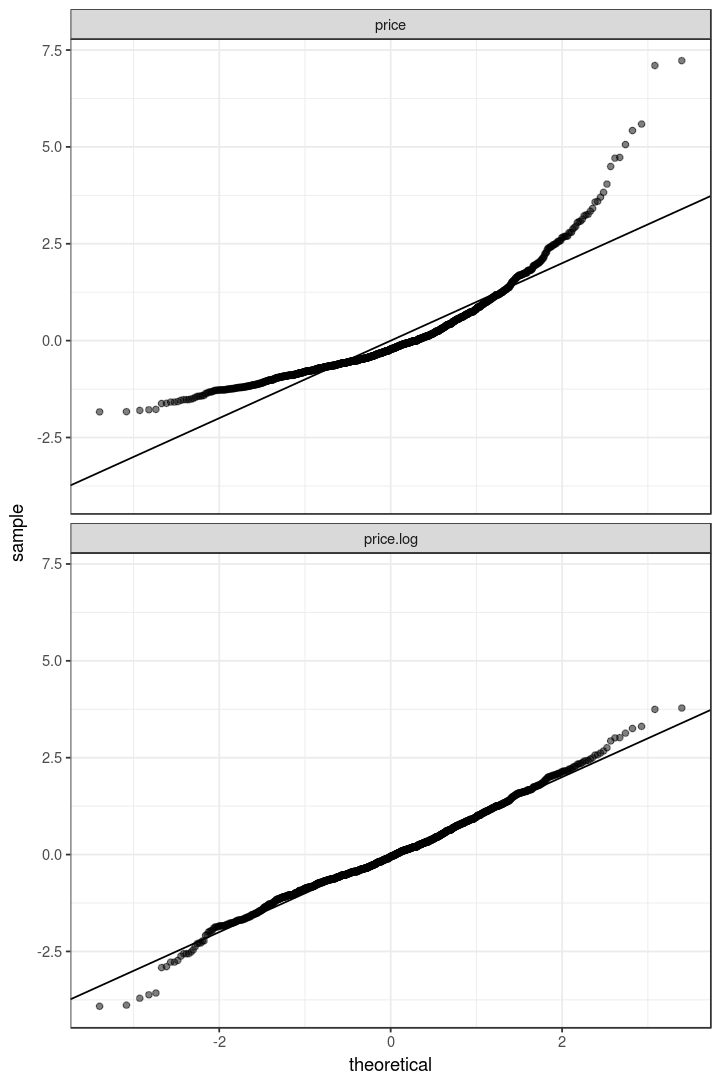

In [71]:
options(repr.plot.width = 6, repr.plot.height = 9)

xxx %>%
group_by(var) %>%
mutate(
    normed_value = (value - mean(value)) / sd(value)
) %>%
ggplot() +
geom_qq(aes(sample=normed_value), alpha=0.5) +
facet_wrap(~var, ncol=1) +
geom_abline(slope=1) +
theme_bw()